# EDUCATIONAL RESOURSES

## Summary
Here we have a data treatment and Machine Learning process using SKLearn (1).
First we carried out a data study, checking Iris data, for this purpose pandas (2) library is really helpful.
Both data and results are transformed in dataframe. Since y is a non-numeric data type it is mandatory to transformn it into a numeric data type.
The study of the data was carried out getting its statisctical propierties and using aome visualization graphs. 

In the second part we build two ML models, one using a hold-out spliting method and the other using KF. The model construction and validation was done using KF Stratified partition.


## Citation 
1- Pedregosa F, Varoquaux, Ga"el, Gramfort A, Michel V, Thirion B, Grisel O, et al. Scikit-learn: Machine learning in Python. Journal of machine learning research. 2011;12(Oct):2825–30.
2- McKinney W, others. Data structures for statistical computing in python. In: Proceedings of the 9th Python in Science Conference. 2010. p. 51–6.

## PART 1 DATA TREATMENT
This part contains code for getting and study data. The data is called Iris. This data is tipically used for training in DataScience.


In [1]:
from sklearn.datasets import load_iris #this enable us the data load

data = load_iris()
X, y = data.data, data.target
#spliting data and result
type(X) 

numpy.ndarray

In [2]:
#gettin data dim
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
#Studing data using dataframes
import pandas as pd
X = pd.DataFrame(X) #obtaining a dataframe object form our data
X.columns = list(data.feature_names) #getting columns original names
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Getting info from the results
y = pd.DataFrame(y,columns=["label"])      

print(y.label.unique())       
print(data.target_names)
y.label.value_counts() #check the amount of data in each y value

[0 1 2]
['setosa' 'versicolor' 'virginica']


label
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
#Statistical Data summary
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

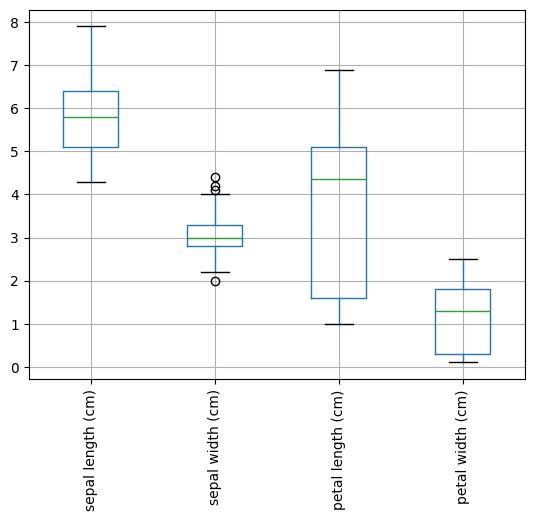

In [11]:
#Data visualization
X.boxplot(rot=90)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

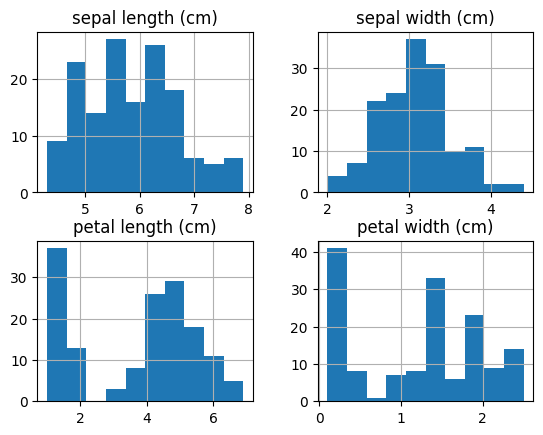

In [12]:
%matplotlib inline
X.hist()

<Axes: ylabel='proportion'>

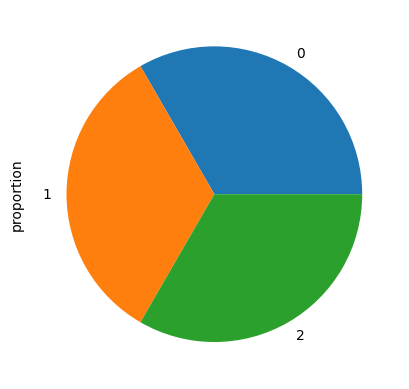

In [13]:
porcentajes = y.label.value_counts(normalize=True)
porcentajes.plot.pie()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

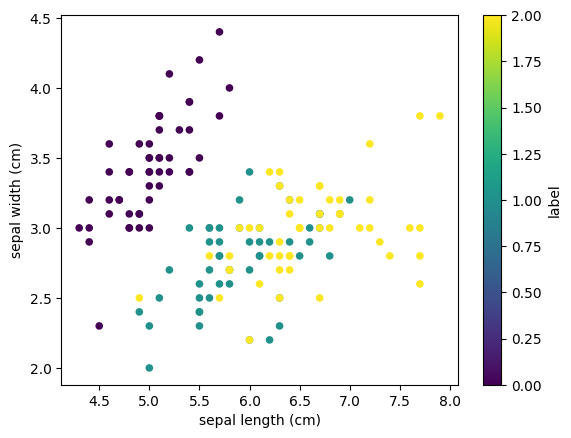

In [14]:
data = X.join(y)              
data.plot.scatter(x="sepal length (cm)",
                      y="sepal width (cm)",
                      c="label",
                      colormap='viridis')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

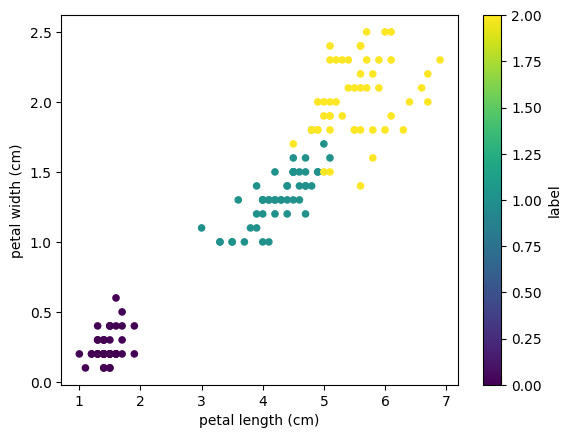

In [15]:
data.plot.scatter(x="petal length (cm)",
                      y="petal width (cm)",
                      c="label",
                      colormap='viridis')

In [16]:
#Studing data correlation
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


## Part 2 ML

In [18]:
#getting training and test sets from Iris data
from sklearn.model_selection import train_test_split #first we get a "hold-out" model

#Parámetros usados:
rd = 42 #al ser un proceso no determinista, fijamos una semilla
ratio = 0.4  #El parámetro más importante: cuál es el ratio usado para entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio,random_state=rd)

print("%s %s" % (X_train.index, X_test.index))
X_train.isin(X_test) #check no duplicated data

Index([123,  24,  25,  23,  94,  39,  95, 117,  47,  97, 113,  33, 138, 101,
        62,  84, 148,  53,   5,  93, 111,  49,  35,  80,  77,  34, 114,   7,
        43,  70,  98, 120,  83, 134, 135,  89,   8,  13, 119, 125,   3,  17,
        38,  72, 136,   6, 112, 100,   2,  63,  54, 126,  50, 115,  46, 139,
        61, 147,  79,  59,  91,  41,  58,  90,  48,  88, 107, 124,  21,  57,
       144, 129,  37, 140,   1,  52, 130, 103,  99, 116,  87,  74, 121, 149,
        20,  71, 106,  14,  92, 102],
      dtype='int64') Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,  32, 142,  85,
        86,  16,  10,  81, 133, 137,  75, 109,  96, 105,  66,   0, 122,  67,
        28,  40,  44,  60],
      dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,False,False,False,False
24,False,False,False,False
25,False,False,False,False
23,False,False,False,False
94,False,False,False,False
...,...,...,...,...
71,False,False,False,False
106,False,False,False,False
14,False,False,False,False
92,False,False,False,False


In [21]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

#Parameters
rd = 42
particiones = 5

#Stratified Partition
skf = StratifiedKFold(n_splits=particiones,shuffle=True,random_state=rd)

#A continuación hacemos cada subdivisión.
print("Checkin class distribution in SKF:")
for train, test in skf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
  print('train -  {}   |   test -  {}'.format(np.bincount(y_train.iloc[:,0]), np.bincount(y_test.iloc[:,0])))



Checkin class distribution in SKF:
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]


In [31]:
y_real = y.loc[test]
etiquetas = load_iris().target_names
print (etiquetas)

['setosa' 'versicolor' 'virginica']


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
#Model training
modelo = SVC()  
modelo.fit(X_train, y_train)

# model Validation
predicciones = modelo.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_real, predicciones, target_names=etiquetas)) #printing validation report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



C:\Users\fcofr\anaconda3\envs\Cursso_ML\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
